# Population Pyramid in Python (All Variants)

We will use:

matplotlib

pandas

synthetic dataset

## Basic Population Pyramid (Two Groups: Male vs Female)

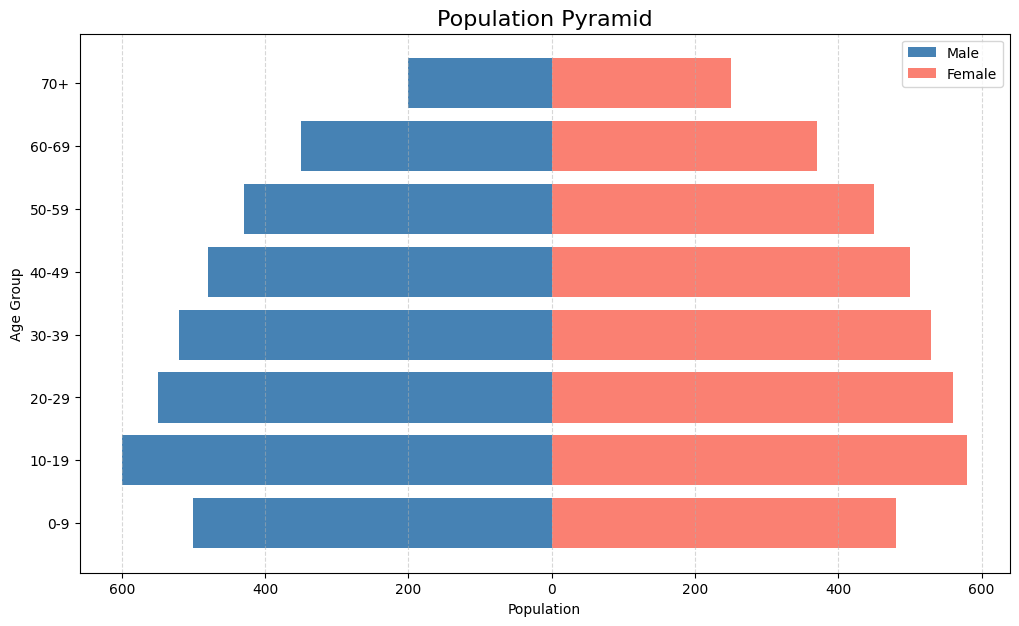

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -------------------------
# Synthetic Dataset Example
# -------------------------
ages = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]

males = [500, 600, 550, 520, 480, 430, 350, 200]
females = [480, 580, 560, 530, 500, 450, 370, 250]

df = pd.DataFrame({
    "Age Group": ages,
    "Male": males,
    "Female": females
})

# Convert males to negative for pyramid
df["Male"] = -df["Male"]

# -------------------------
# Plotting
# -------------------------
plt.figure(figsize=(12, 7))
plt.barh(df["Age Group"], df["Male"], color="steelblue", label="Male")
plt.barh(df["Age Group"], df["Female"], color="salmon", label="Female")

plt.title("Population Pyramid", fontsize=16)
plt.xlabel("Population")
plt.ylabel("Age Group")

# Fix x-ticks to show positive values
xticks = np.arange(-600, 601, 200)
plt.xticks(xticks, [abs(x) for x in xticks])

plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


## Population Pyramid With More Than Two Groups (e.g., Male, Female, Others)

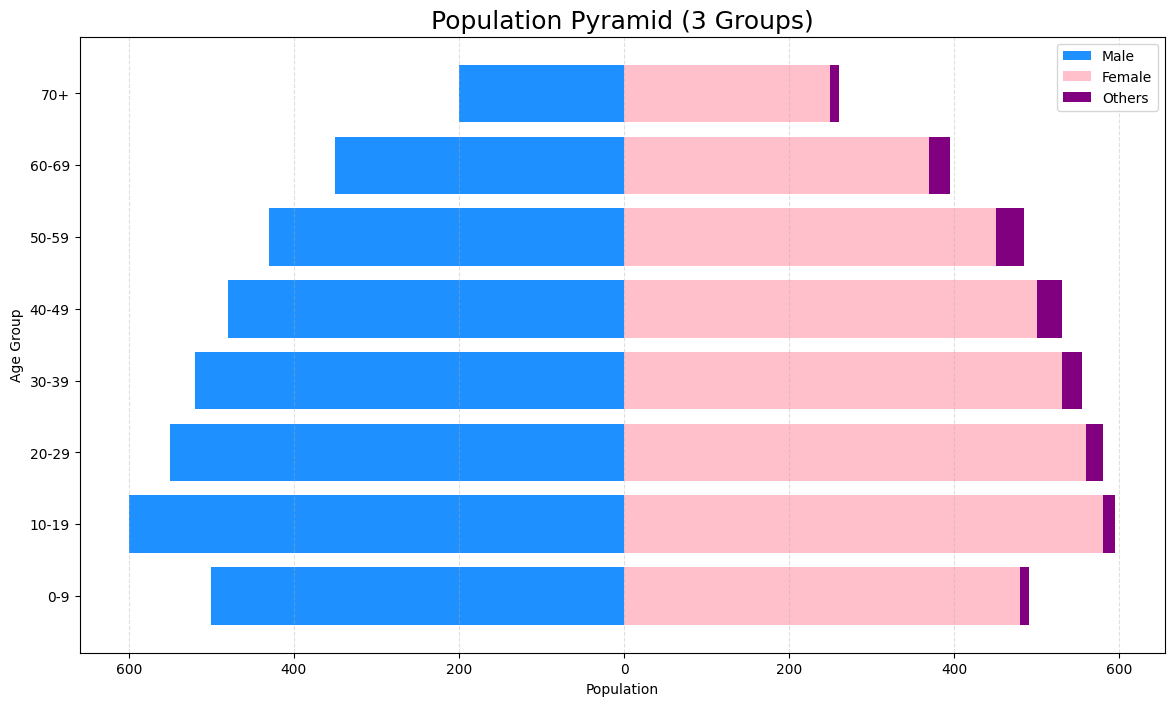

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ages = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]

male = np.array([500, 600, 550, 520, 480, 430, 350, 200])
female = np.array([480, 580, 560, 530, 500, 450, 370, 250])
others = np.array([10, 15, 20, 25, 30, 35, 25, 10])

df = pd.DataFrame({
    "Age Group": ages,
    "Male": -male,      # left side
    "Female": female,   # right side
    "Others": others    # right side
})

plt.figure(figsize=(14, 8))

plt.barh(df["Age Group"], df["Male"], color="dodgerblue", label="Male")
plt.barh(df["Age Group"], df["Female"], left=0, color="pink", label="Female")
plt.barh(df["Age Group"], df["Others"], left=df["Female"], color="purple", label="Others")

plt.title("Population Pyramid (3 Groups)", fontsize=18)
plt.xlabel("Population")
plt.ylabel("Age Group")

# Fix ticks
xticks = np.arange(-600, 601, 200)
plt.xticks(xticks, [abs(x) for x in xticks])

plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()


## Population Pyramid With Percentage Instead of Raw Counts

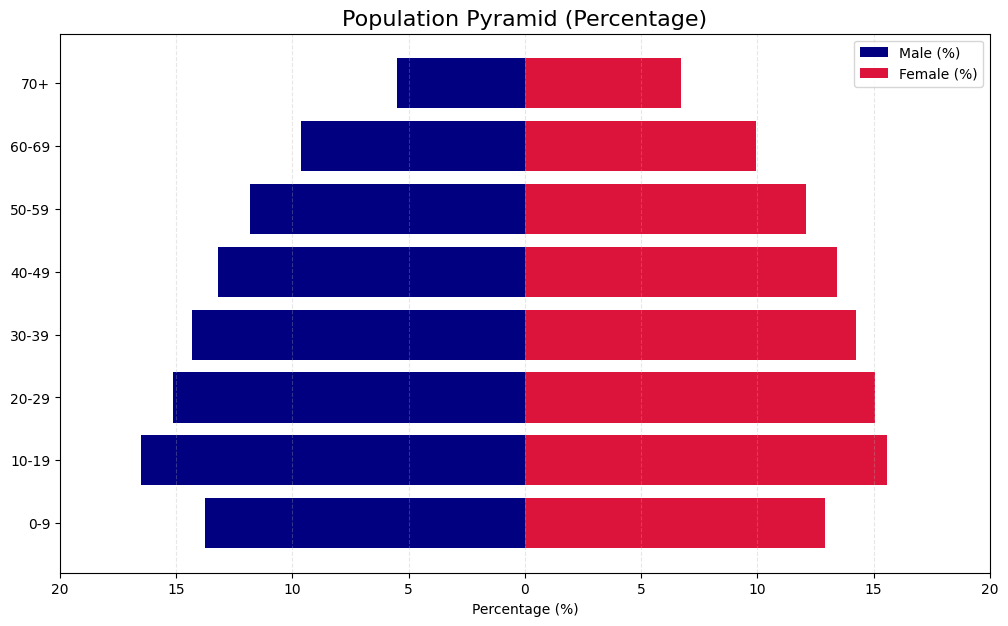

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ages = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]

male = np.array([500, 600, 550, 520, 480, 430, 350, 200])
female = np.array([480, 580, 560, 530, 500, 450, 370, 250])

# Convert to percentage
male_pct = male / male.sum() * 100
female_pct = female / female.sum() * 100

df = pd.DataFrame({
    "Age Group": ages,
    "Male (%)": -male_pct,
    "Female (%)": female_pct
})

plt.figure(figsize=(12, 7))
plt.barh(df["Age Group"], df["Male (%)"], color="navy", label="Male (%)")
plt.barh(df["Age Group"], df["Female (%)"], color="crimson", label="Female (%)")

plt.title("Population Pyramid (Percentage)", fontsize=16)
plt.xlabel("Percentage (%)")

xticks = np.arange(-20, 21, 5)
plt.xticks(xticks, [abs(x) for x in xticks])

plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()



## Stacked Horizontal Pyramid for Subgroups (Urban / Rural Split)

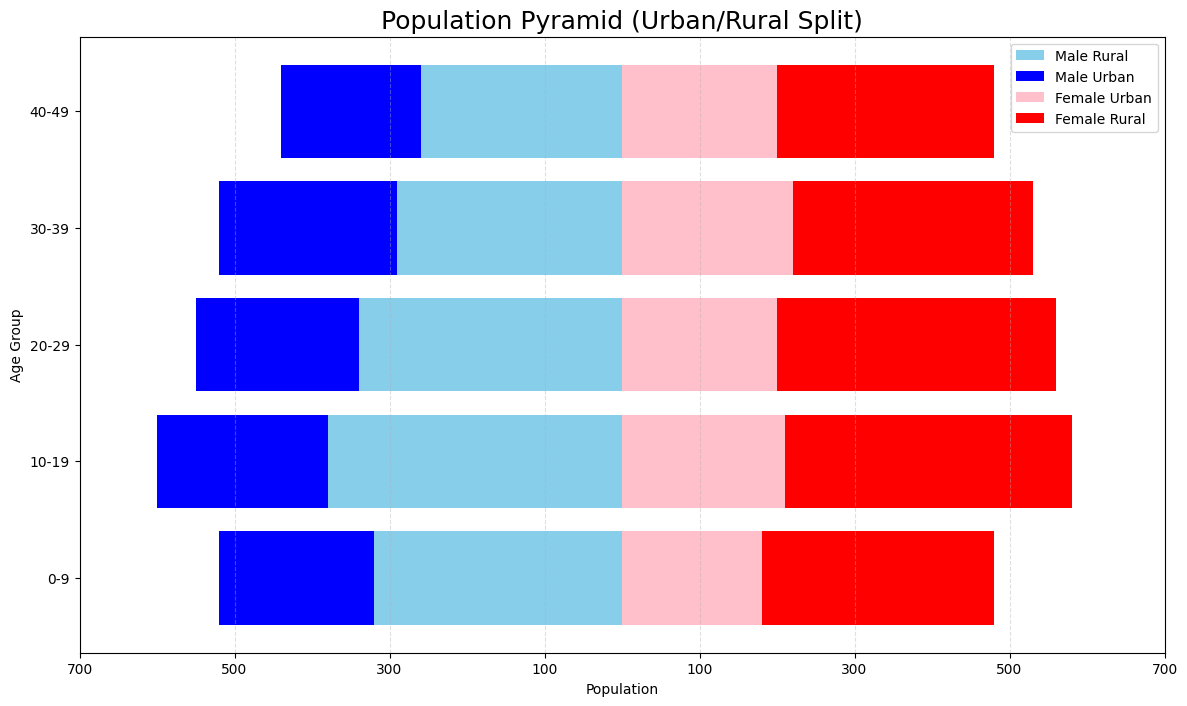

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ages = ["0-9", "10-19", "20-29", "30-39", "40-49"]

male_urban = np.array([200, 220, 210, 230, 180])
male_rural = np.array([320, 380, 340, 290, 260])

female_urban = np.array([180, 210, 200, 220, 200])
female_rural = np.array([300, 370, 360, 310, 280])

df = pd.DataFrame({
    "Age Group": ages,
    "Male Urban": -male_urban,
    "Male Rural": -male_rural,
    "Female Urban": female_urban,
    "Female Rural": female_rural
})

plt.figure(figsize=(14, 8))

# Male side (negative)
plt.barh(df["Age Group"], df["Male Rural"], color="skyblue", label="Male Rural")
plt.barh(df["Age Group"], df["Male Urban"], left=df["Male Rural"], color="blue", label="Male Urban")

# Female side (positive)
plt.barh(df["Age Group"], df["Female Urban"], color="pink", label="Female Urban")
plt.barh(df["Age Group"], df["Female Rural"], left=df["Female Urban"], color="red", label="Female Rural")

plt.title("Population Pyramid (Urban/Rural Split)", fontsize=18)
plt.xlabel("Population")
plt.ylabel("Age Group")

xticks = np.arange(-700, 701, 200)
plt.xticks(xticks, [abs(x) for x in xticks])

plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()


## Population Pyramid With Smoothed Curves (Advanced Density Style)

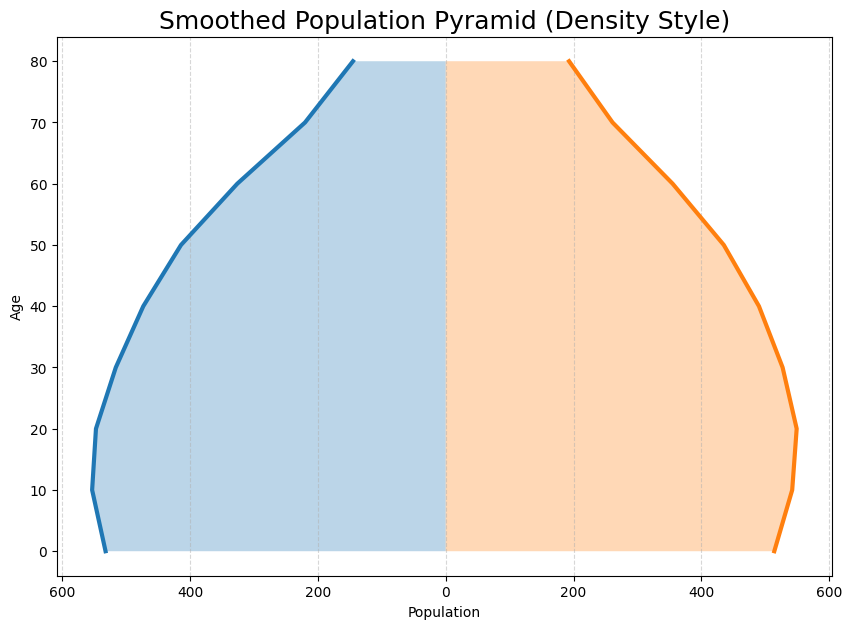

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

ages = np.arange(0, 90, 10)
male = np.array([500, 600, 550, 520, 480, 430, 350, 200, 100])
female = np.array([480, 580, 560, 530, 500, 450, 370, 250, 150])

male_smooth = gaussian_filter1d(male, sigma=1)
female_smooth = gaussian_filter1d(female, sigma=1)

plt.figure(figsize=(10, 7))

plt.plot(-male_smooth, ages, linewidth=3)
plt.plot(female_smooth, ages, linewidth=3)

plt.fill_betweenx(ages, -male_smooth, 0, alpha=0.3)
plt.fill_betweenx(ages, 0, female_smooth, alpha=0.3)

plt.title("Smoothed Population Pyramid (Density Style)", fontsize=18)
plt.xlabel("Population")
plt.ylabel("Age")

xticks = np.arange(-600, 601, 200)
plt.xticks(xticks, [abs(x) for x in xticks])

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()
